##사인 함수 예측하기

In [1]:
# 필요한 라이브러리 불러오기
import math     # 수학 패키지 임포트
import torch    # 파이토치 모듈 임포트
import matplotlib.pyplot as plt #시각화 라이브로 matplotlib 임포트

# 1 -pi부터 pi 사이에서 점을 1,000개 추출
x = torch.linspace(-math.pi, math.pi, 1000)

# 2 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

In [2]:
# 3 예측 사인곡선에 사용할 임의의 가중치 (계수)를 뽑아 y 만들기
a = torch.randn (())
b = torch.randn (())
c = torch.randn (())
d = torch.randn (())


# 사인 함수를 근사할 3차 다항식 정의
y_random = a * x ** 3 + b * x ** 2 + c * x + d

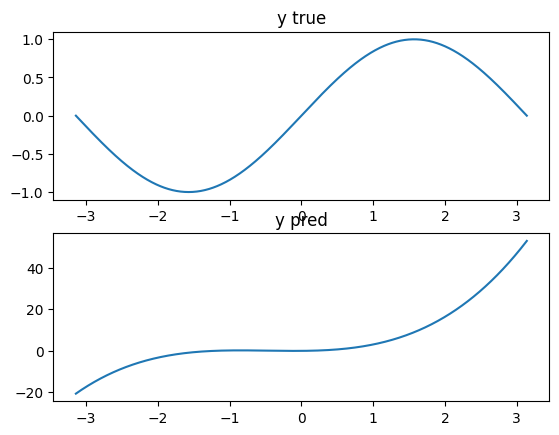

In [3]:
# 4 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(2, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 5 예측 사인곡선을 임의의 가중치로 만든 y값으로 만들기
plt.subplot(2, 1, 2)
plt.title("y pred")
plt.plot(x, y_random)

# 6 실제와 예측 사인 곡선 출력하기
plt.show()

In [4]:
learning_rate = 1e-6  # 학습률 정의

# 학습 2,000번 진행
for epoch in range(2000):
    y_pred = a * x**3 + b * x**2 + c * x + d

    loss = (y_pred - y).pow(2).sum().item()  # ① 손실 정의
    if epoch % 100 == 0:
        print(f"epoch{epoch+1} loss: {loss}")

    grad_y_pred = 2.0 * (y_pred - y)  # ② 기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= learning_rate * grad_a  # ③ 가중치 업데이트
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


epoch1 loss: 241617.296875
epoch101 loss: 327.4047546386719
epoch201 loss: 257.92999267578125
epoch301 loss: 212.29296875
epoch401 loss: 174.91151428222656
epoch501 loss: 144.28370666503906
epoch601 loss: 119.18412780761719
epoch701 loss: 98.61058807373047
epoch801 loss: 81.74353790283203
epoch901 loss: 67.91216278076172
epoch1001 loss: 56.56751251220703
epoch1101 loss: 47.26063537597656
epoch1201 loss: 39.62372589111328
epoch1301 loss: 33.355594635009766
epoch1401 loss: 28.20979881286621
epoch1501 loss: 23.984233856201172
epoch1601 loss: 20.5136775970459
epoch1701 loss: 17.662464141845703
epoch1801 loss: 15.319482803344727
epoch1901 loss: 13.393592834472656


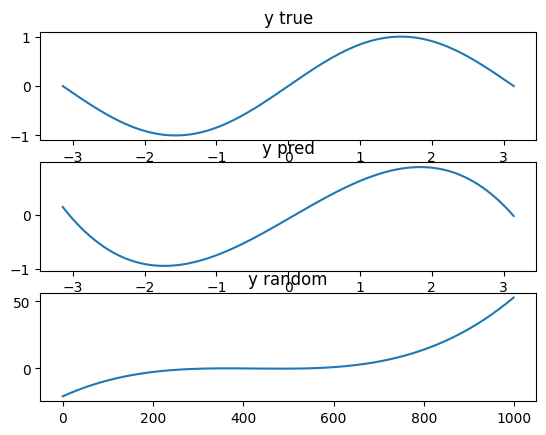

In [5]:
# 실제 사인 곡선을 그리기
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측한 가중치의 사인 곡선을 그리기
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선 그리기
plt.subplot(3, 1, 3)
plt.plot(y_random)
plt.title("y random")

# 실제로 그래프 출력하기
plt.show()


## 보스턴

In [6]:
pip install scikit-learn==1.1.3


In [7]:
import pandas as pd

from sklearn.datasets import load_boston

dataset = load_boston()

dataFrame = pd.DataFrame(dataset["data"])  # ① 데이터셋의 데이터를 불러오기
dataFrame.columns = dataset["feature_names"]  # ② 특징의 이름 불러오기

dataFrame["target"] = dataset["target"]  # ③ 데이터프레임에 정답 추가

print(dataFrame.head())  # ④ 데이터프레임을 요약해서 출력


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [8]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

# 모델 정의
model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)


In [9]:
X = dataFrame.iloc[:, :13].values  # ② 정답을 제외한 특징을 X에 입력
Y = dataFrame["target"].values  # 데이터프레임의 target 값을 추출

batch_size = 100
learning_rate = 0.001

# ③ 가중치를 수정하는 최적화 함수 정의
optim = Adam(model.parameters(), lr=learning_rate)

# 에포크 반복
for epoch in range(200):

    # 배치 반복
    for i in range(len(X) // batch_size):
        start = i * batch_size  # ④ 배치 크기에 맞게 인덱스 지정
        end = start + batch_size


In [10]:
# 파이토치 실수형 텐서로 변환
x = torch.FloatTensor(X[start:end])
y = torch.FloatTensor(Y[start:end])

optim.zero_grad()  # ⑤ 가중치의 기울기를 0으로 초기화
preds = model(x)  # ⑥ 모델의 예측값 계산

loss = nn.MSELoss()(preds, y)  # ⑦ MSE 손실 계산
loss.backward()  # ⑧ 오차 역전파

optim.step()  # ⑨ 최적화 진행

if epoch % 20 == 0:
    print(f"epoch{epoch} loss:{loss.item()}")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### 모델 성능 평가

In [11]:
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"prediction:{prediction.item()} real:{real}")


prediction:-12.630361557006836 real:24.0


## 손글씨 분류하기

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 53.5MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 33.4MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 96.7MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.15MB/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000
10000


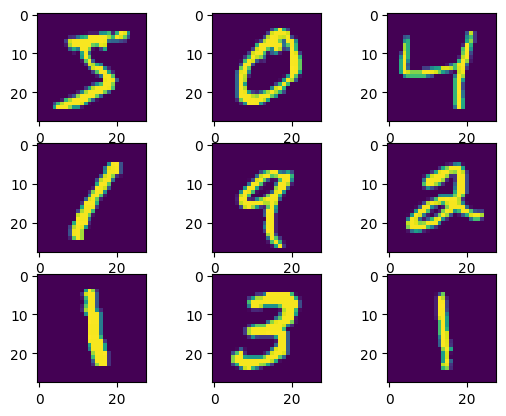

In [12]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# ① 학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data = MNIST(root="./", train=False, download=True, transform=ToTensor())

# 학습에 사용할 데이터 개수 출력
print(len(training_data))

# 평가에 사용할 데이터 개수 출력
print(len(test_data))

# 샘플 이미지 9개 출력
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
plt.show()


In [13]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

# ① 평가용은 데이터를 섞을 필요가 없음
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [14]:
import torch
import torch.nn as nn

from torch.optim.adam import Adam

# ① 학습에 사용할 프로세서 지정
device = "cuda" if torch.cuda.is_available() else "cpu"

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

model.to(device)  # 모델의 파라미터를 GPU로 보냄


Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [15]:
lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()

        # ② 입력 데이터 모양을 모델의 입력에 맞게 변환
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)

        # ③ 손실 계산
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()  # 오차 역전파
        optim.step()  # 최적화 진행

    print(f"epoch{epoch+1} loss:{loss.item()}")

# ④ 모델을 MNIST.pth라는 이름으로 저장
torch.save(model.state_dict(), "MNIST.pth")


epoch1 loss:0.03222962096333504
epoch2 loss:0.09616387635469437
epoch3 loss:0.3278578817844391
epoch4 loss:0.10523800551891327
epoch5 loss:0.0185091570019722
epoch6 loss:0.026118917390704155
epoch7 loss:0.0574236661195755
epoch8 loss:0.04163411632180214
epoch9 loss:0.03906391188502312
epoch10 loss:0.01163135189563036
epoch11 loss:0.01244646217674017
epoch12 loss:0.00024773136829026043
epoch13 loss:0.0010030592093244195
epoch14 loss:0.0001710650249151513
epoch15 loss:0.0035062539391219616
epoch16 loss:0.2316388636827469
epoch17 loss:0.0011301754275336862
epoch18 loss:0.04134300351142883
epoch19 loss:0.009711680002510548
epoch20 loss:0.012987238354980946


In [16]:
# ① 모델 가중치 불러오기
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0  # 분류에 성공한 전체 개수

with torch.no_grad():  # ② 기울기를 계산하지 않음
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 784)).to(device)

        output = model(data.to(device))
        preds = output.data.max(1)[1]  # ③ 모델의 예측값 계산

        # ④ 올바르게 분류한 개수
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr

print(f"Accuracy:{num_corr/len(test_data)}")  # 분류 정확도 출력


<ipython-input-16-a48428fc4ed5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("MNIST.pth", map_location=device))


Accuracy:0.9729
